In [77]:
import cv2
import numpy as np

In [78]:
import google.colab.patches as goog
from google.colab.patches import cv2_imshow

In [79]:
# Load the video
video_path = '/content/A1606b0e6_0 (29).mp4'  # Replace with your video file
cap = cv2.VideoCapture(video_path)

In [80]:
# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

In [81]:
# Initialize SIFT or ORB
sift = cv2.SIFT_create()
orb = cv2.ORB_create()

In [82]:
# Define output video writer if saving output
output_path = 'processed_football_video.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for AVI
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

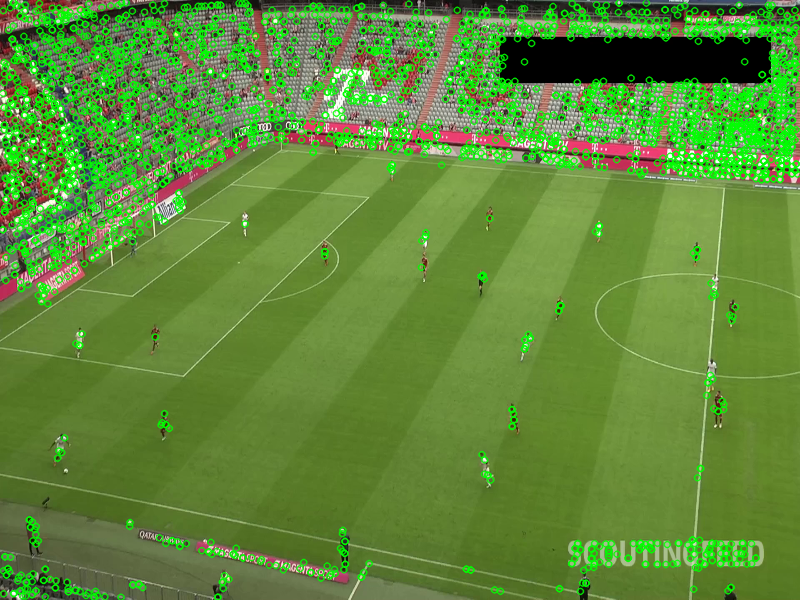

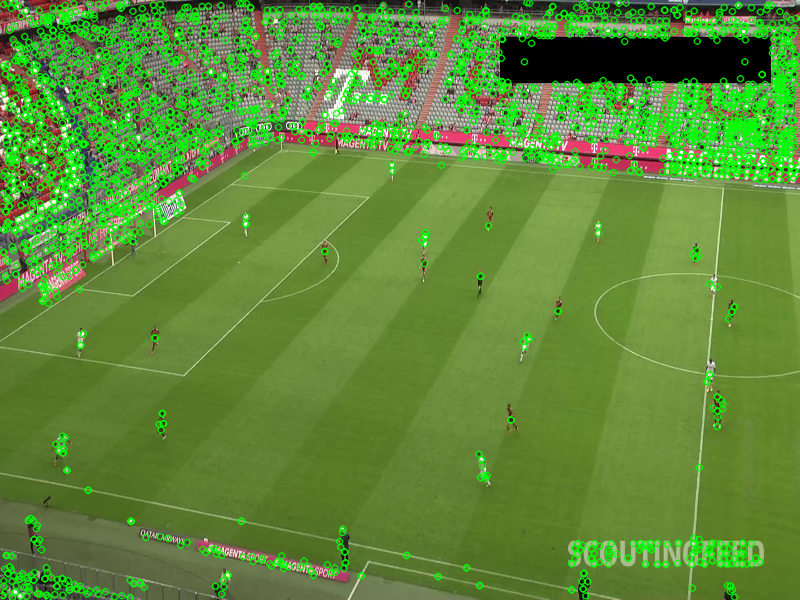

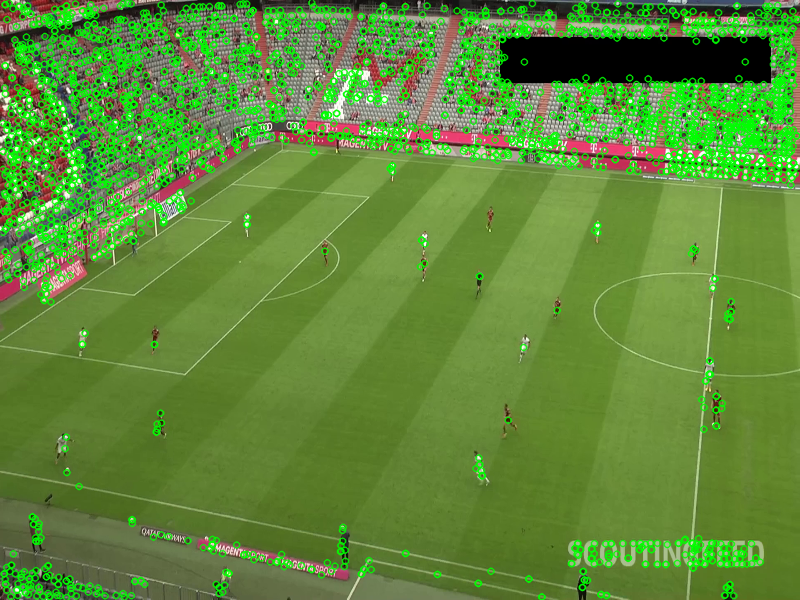

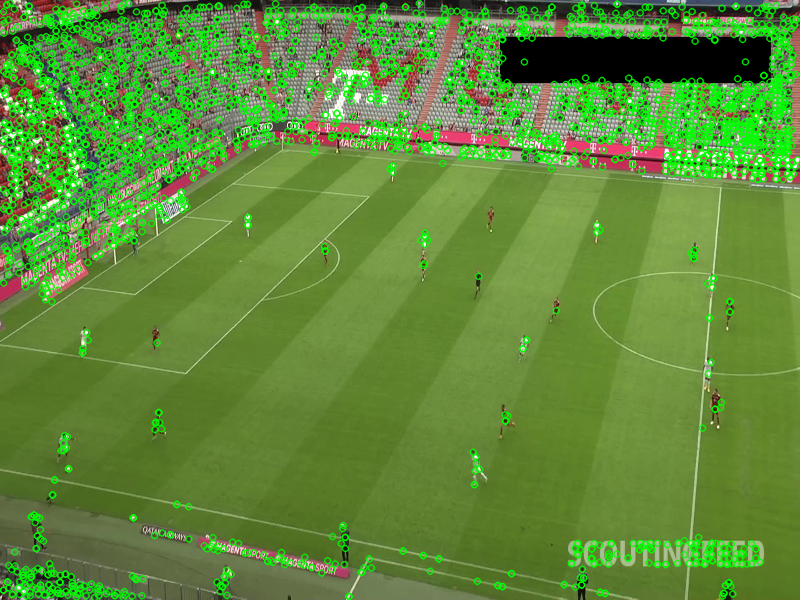

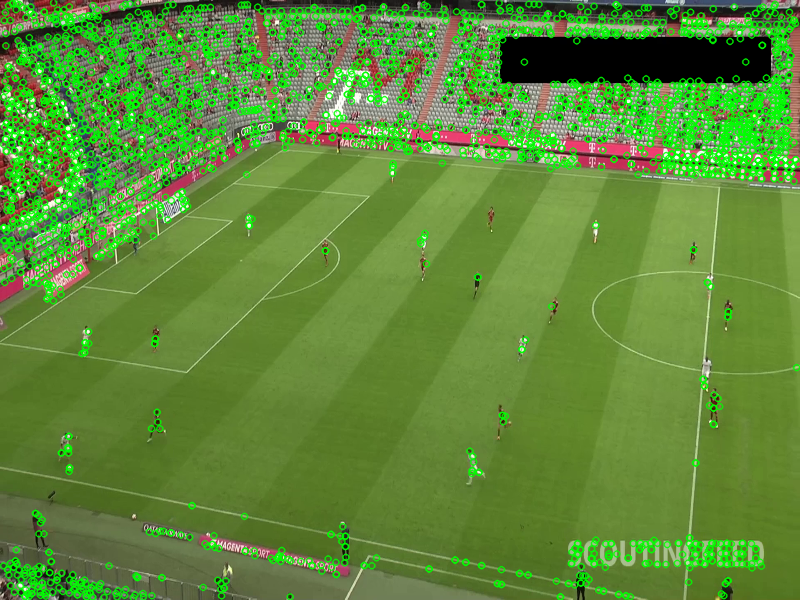

In [83]:
frame_count = 0  # Track frames

while cap.isOpened() and frame_count < 5:  # Limit to 5 frames
    ret, frame = cap.read()
    if not ret:
        print("End of video or error reading frame.")
        break
    # Resize for faster processing
    frame_resized = cv2.resize(frame, (800, 600))
    gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)

    # SIFT feature detection
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    # Draw SIFT keypoints on the frame
    frame_with_keypoints = cv2.drawKeypoints(frame_resized, keypoints, None, color=(0, 255, 0))

    # Display the result
    goog.cv2_imshow(frame_with_keypoints)

    # Write frame to output video
    out.write(frame_with_keypoints)

    # Increment frame counter
    frame_count += 1

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()


In [84]:
# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()
print("Processing complete. Output saved to:", output_path)


Processing complete. Output saved to: processed_football_video.avi
